In [1]:
import sys
sys.path.insert(0, '../../modules')
%pylab inline
%run ../visualizations.ipynb

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
from tracking import HoughSpace
from scipy import sparse
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.ticker as mtick
from hits import CyDetHits, CTHHits, CDCHits
from cylinder import CDC

# Import RECBE Wiring

In [3]:
import root_numpy
from pprint import pprint
from pandas import DataFrame

In [6]:
recbe_wiring_file = "/home/elg112/development/ICEDUST/track_finding_standalone/"+\
                    "track_finding_yandex/data/chanmap_20160814.root"
recbe_positions = root_numpy.root2array(recbe_wiring_file, 
                                        selection="isSenseWire == 1 && LayerID > 0 && LayerID < 19")
recbe_positions["LayerID"] = recbe_positions["LayerID"] - 1

In [7]:
root_numpy.list_branches(recbe_wiring_file)

['LayerLength',
 'layer',
 'wire',
 'xhv',
 'yhv',
 'x0',
 'y0',
 'xro',
 'yro',
 'LayerID',
 'isSenseWire',
 'CellID',
 'BoardID',
 'BrdLayID',
 'BrdLocID',
 'ChanID']

In [8]:
root_numpy.list_trees(recbe_wiring_file)

['t']

In [ ]:
print max(recbe_positions["LayerID"])

In [18]:
rbdf = DataFrame(recbe_positions).sort_values(by=["LayerID", "CellID"])
rbdf

,LayerLength,layer,wire,xhv,yhv,x0,y0,xro,yro,LayerID,isSenseWire,CellID,BoardID,BrdLayID,BrdLocID,ChanID
0,1481.688151,2,1,521.948109,-92.033534,528.333031,-42.002477,529.933288,8.408961,0,1,0,0,0,0,2
1,1481.688151,2,3,524.605364,-75.426864,529.399690,-25.218415,529.399690,25.218415,0,1,1,0,0,0,1
2,1481.688151,2,5,526.734386,-58.744246,529.933288,-8.408961,528.333031,42.002477,0,1,2,0,0,0,3
3,1481.688151,2,7,528.333031,-42.002477,529.933288,8.408961,526.734386,58.744246,0,1,3,0,0,0,14
4,1481.688151,2,9,529.399690,-25.218415,529.399690,25.218415,524.605364,75.426864,0,1,4,0,0,0,21
5,1481.688151,2,11,529.933288,-8.408961,528.333031,42.002477,521.948109,92.033534,0,1,5,0,0,0,23
6,1481.688151,2,13,529.933288,8.408961,526.734386,58.744246,518.765296,108.547534,0,1,6,0,0,0,24
7,1481.688151,2,15,529.399690,25.218415,524.605364,75.426864,515.060131,124.952236,0,1,7,0,0,0,26
8,1481.688151,2,17,528.333031,42.002477,521.948109,92.033534,510.836344,141.231121,0,1,8,0,0,0,29
9,1481.688151,2,19,526.734386,58.744246,518.765296,108.547534,506.098188,157.367799,0,1,9,0,0,0,41


## Check Correspondence

In [9]:
cydet_geom = CDC(projection=0.0)

In [29]:
print("[",)
counter = 0
for value in cydet_geom.point_phis[cydet_geom.first_point] - np.pi:
    print("{0:08f}".format(value)+",",)
    counter += 1
    if counter % 2 == 0:
        print("\n ",)
print("]")

[
-6.267318,
-6.267785,

 
0.000000,
-6.268642,

 
0.000000,
-6.283185,

 
-6.269759,
0.000000,

 
-6.270414,
0.000000,

 
-6.271009,
0.000000,

 
-6.271549,
-6.283185,

 
0.000000,
0.000000,

 
-6.272499,
0.000000,

 
]


In [30]:
layer_id = 1
#recbe_wires = recbe_positions[np.where(recbe_positions["LayerID"] == layer_id+1)]

In [10]:
x_pos_cdc, y_pos_cdc = cydet_geom.get_points_xs_and_ys()

In [11]:
all_colour = np.linspace(0,1,104)
np.random.shuffle(all_colour)

In [12]:
all_colour = np.linspace(0,1,104)
np.random.shuffle(all_colour)
import matplotlib.cm as cm
from scipy.spatial import ConvexHull

In [35]:
#print np.ones((200,4,2))[0]

In [36]:
dphi_point = cydet_geom.dphi_by_layer[cydet_geom.point_layers]
drad_point = np.ones(4482) * 1.6
cy_rho, cy_phi = cydet_geom.get_points_rhos_and_phis()
bound_box = np.zeros((cydet_geom.n_points, 9, 2))
enum = 0
for d_phi in [dphi_point, -dphi_point, 0]:
    for d_rho in [drad_point, -drad_point, 0]:
        bound_box[:,enum,0] = cy_rho + d_rho/2.
        bound_box[:,enum,1] = cy_phi + d_phi/2.
        enum += 1

In [38]:
bound_box_cart = np.zeros_like(bound_box)
bound_box_cart[:,:,0] = bound_box[:,:,0] * np.cos(bound_box[:,:,1])
bound_box_cart[:,:,1] = bound_box[:,:,0] * np.sin(bound_box[:,:,1])
print(bound_box[10])
print(np.vstack(bound_box_cart[10:20]).shape)

[[ 53.8         -2.79252643]
 [ 52.2         -2.79252643]
 [ 53.          -2.79252643]
 [ 53.8         -2.82425969]
 [ 52.2         -2.82425969]
 [ 53.          -2.82425969]
 [ 53.8         -2.80839306]
 [ 52.2         -2.80839306]
 [ 53.          -2.80839306]]
(90, 2)


In [41]:
recbe_layers = recbe_positions["LayerID"]
recbe_cells = recbe_positions["CellID"]
recbe_flat = cydet_geom.point_lookup[recbe_layers,recbe_cells]
board_id_flat = recbe_positions["BoardID"]
board_neighs = board_id_flat[cydet_geom.shift_wires(-1)]
board_neighs = np.vstack([board_id_flat[cydet_geom.shift_wires(-1)],
                          board_id_flat[cydet_geom.shift_wires(0)],
                          board_id_flat[cydet_geom.shift_wires(1)]]).T
#lim_point_lr = np.vstack([board_neighs[:,0] == board_neighs[:,1],
#                          board_neighs[:,2] == board_neighs[:,1],
#                          board_]).T

[  0   1   2   3   4   5   6   7   8   9  10  11 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 403 404 405 410 411 412 413 414 611]
[ 12  13  14  15  16  17  18  19  20  21  22  23  24 211 212 213 214 215
 216 217 218 219 220 221 222 223 415 416 417 418 422 423 424 425 426]
[ 25  26  27  28  29  30  31  32  33  34  35  36 224 225 226 227 228 229
 230 231 232 233 234 235 236 427 428 429 430 431 432 435 436 437 438 439]
[ 37  38  39  40  41  42  43  44  45  46  47  48 237 238 239 240 241 242
 243 244 245 246 247 248 441 442 443 444 445 446 448 449 450 451 452 453]
[ 49  50  51  52  53  54  55  56  57  58  59  60  61 249 250 251 252 253
 254 255 256 257 258 259 260 261 454 455 456 461 462 463 464 465 466]
[ 62  63  64  65  66  67  68  69  70  71  72  73 262 263 264 265 266 267
 268 269 270 271 272 273 274 468 469 470 471 474 475 476 477 478 479]
[ 74  75  76  77  78  79  80  81  82  83  84  85  86 275 276 277 278 279
 280 281 282 283 284 285 286 287 481 482 483 484 485 486 487 

/home/elg112/development/miniconda2/envs/rep/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


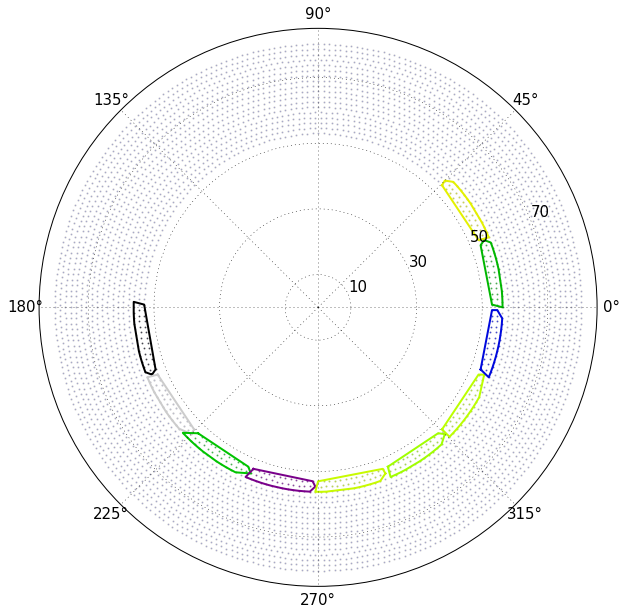

In [4]:
cydet_geom = CDC(projection=0.0)
all_colour = np.linspace(0,1,104)
np.random.shuffle(all_colour)
import matplotlib.cm as cm
from scipy.spatial import ConvexHull
plot_output(np.zeros(cydet_geom.n_points), cydet_geom, figsize=(10,10))
plot_colors = iter(cm.nipy_spectral(all_colour))
x_pos_cdc, y_pos_cdc = cydet_geom.get_points_xs_and_ys()
recbe_wiring_file = "/home/elg112/development/ICEDUST/track_finding_standalone/"+\
                    "track_finding_yandex/data/chanmap_20160814.root"
recbe_positions = root_numpy.root2array(recbe_wiring_file, 
                                        selection="isSenseWire == 1 && LayerID > 0 && LayerID < 19")
recbe_positions["LayerID"] = recbe_positions["LayerID"] - 1


for board_id in range(10):
#plt.scatter(x_pos_recbe, y_pos_recbe, s=4, transform=gca().transData._b, color="blue")
    recbe_wires = recbe_positions[np.where( (recbe_positions["BoardID"] == board_id))]
    recbe_layers = recbe_wires["LayerID"]
    recbe_cells = recbe_wires["CellID"]
    board_point_ids = cydet_geom.point_lookup[recbe_layers,recbe_cells]
    print(board_point_ids)
    points = np.vstack([x_pos_cdc[board_point_ids], 
                        y_pos_cdc[board_point_ids]]).T
    #points = np.vstack(bound_box_cart[board_point_ids])
    c_hull = ConvexHull(points)
    plot_verts = np.append(c_hull.vertices, c_hull.vertices[0])
    plt_col = next(plot_colors)
    plt.plot(points[plot_verts,0], 
             points[plot_verts,1], 
             color=plt_col, 
             lw=2,transform=gca().transData._b)
    plt.scatter(points[:,0], points[:,1], s=0.5, 
                color=plt_col,
                alpha=0.5,
                transform=gca().transData._b)
